# 0. Computer Vision Library

In [1]:
# PyTorch
import torch
from torch import nn

# torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# matplotlib for visulization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(
    f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.1.0
torchvision version: 0.16.0


# 1. Getting Dataset

In [2]:
# setup training data
train_data = datasets.FashionMNIST(
  root='datasets', # where to download data to?
  train=True, # get training data
  download= True, # dowlload data if doest exists on disk
  transform=ToTensor(),  # images come as PIL format, we want to turn into Torch tensors
  target_transform=None  # you can transform labels as well
)

# setup testing data
test_data = datasets.FashionMNIST(
  root='datasets',
  train=False, # get test data
  download=True,
  transform=ToTensor()
)

In [3]:
# see first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 input and output shape

In [4]:
image.shape  # [color_channels=1, height=28, width=28]

torch.Size([1, 28, 28])

shape berbentuk CWH (color_channel, Height, Width)

Note: You'll also see NCHW and NHWC formats where N stands for number of images. For example if you have a batch_size=32, your tensor shape may be [32, 1, 28, 28]. We'll cover batch sizes later.

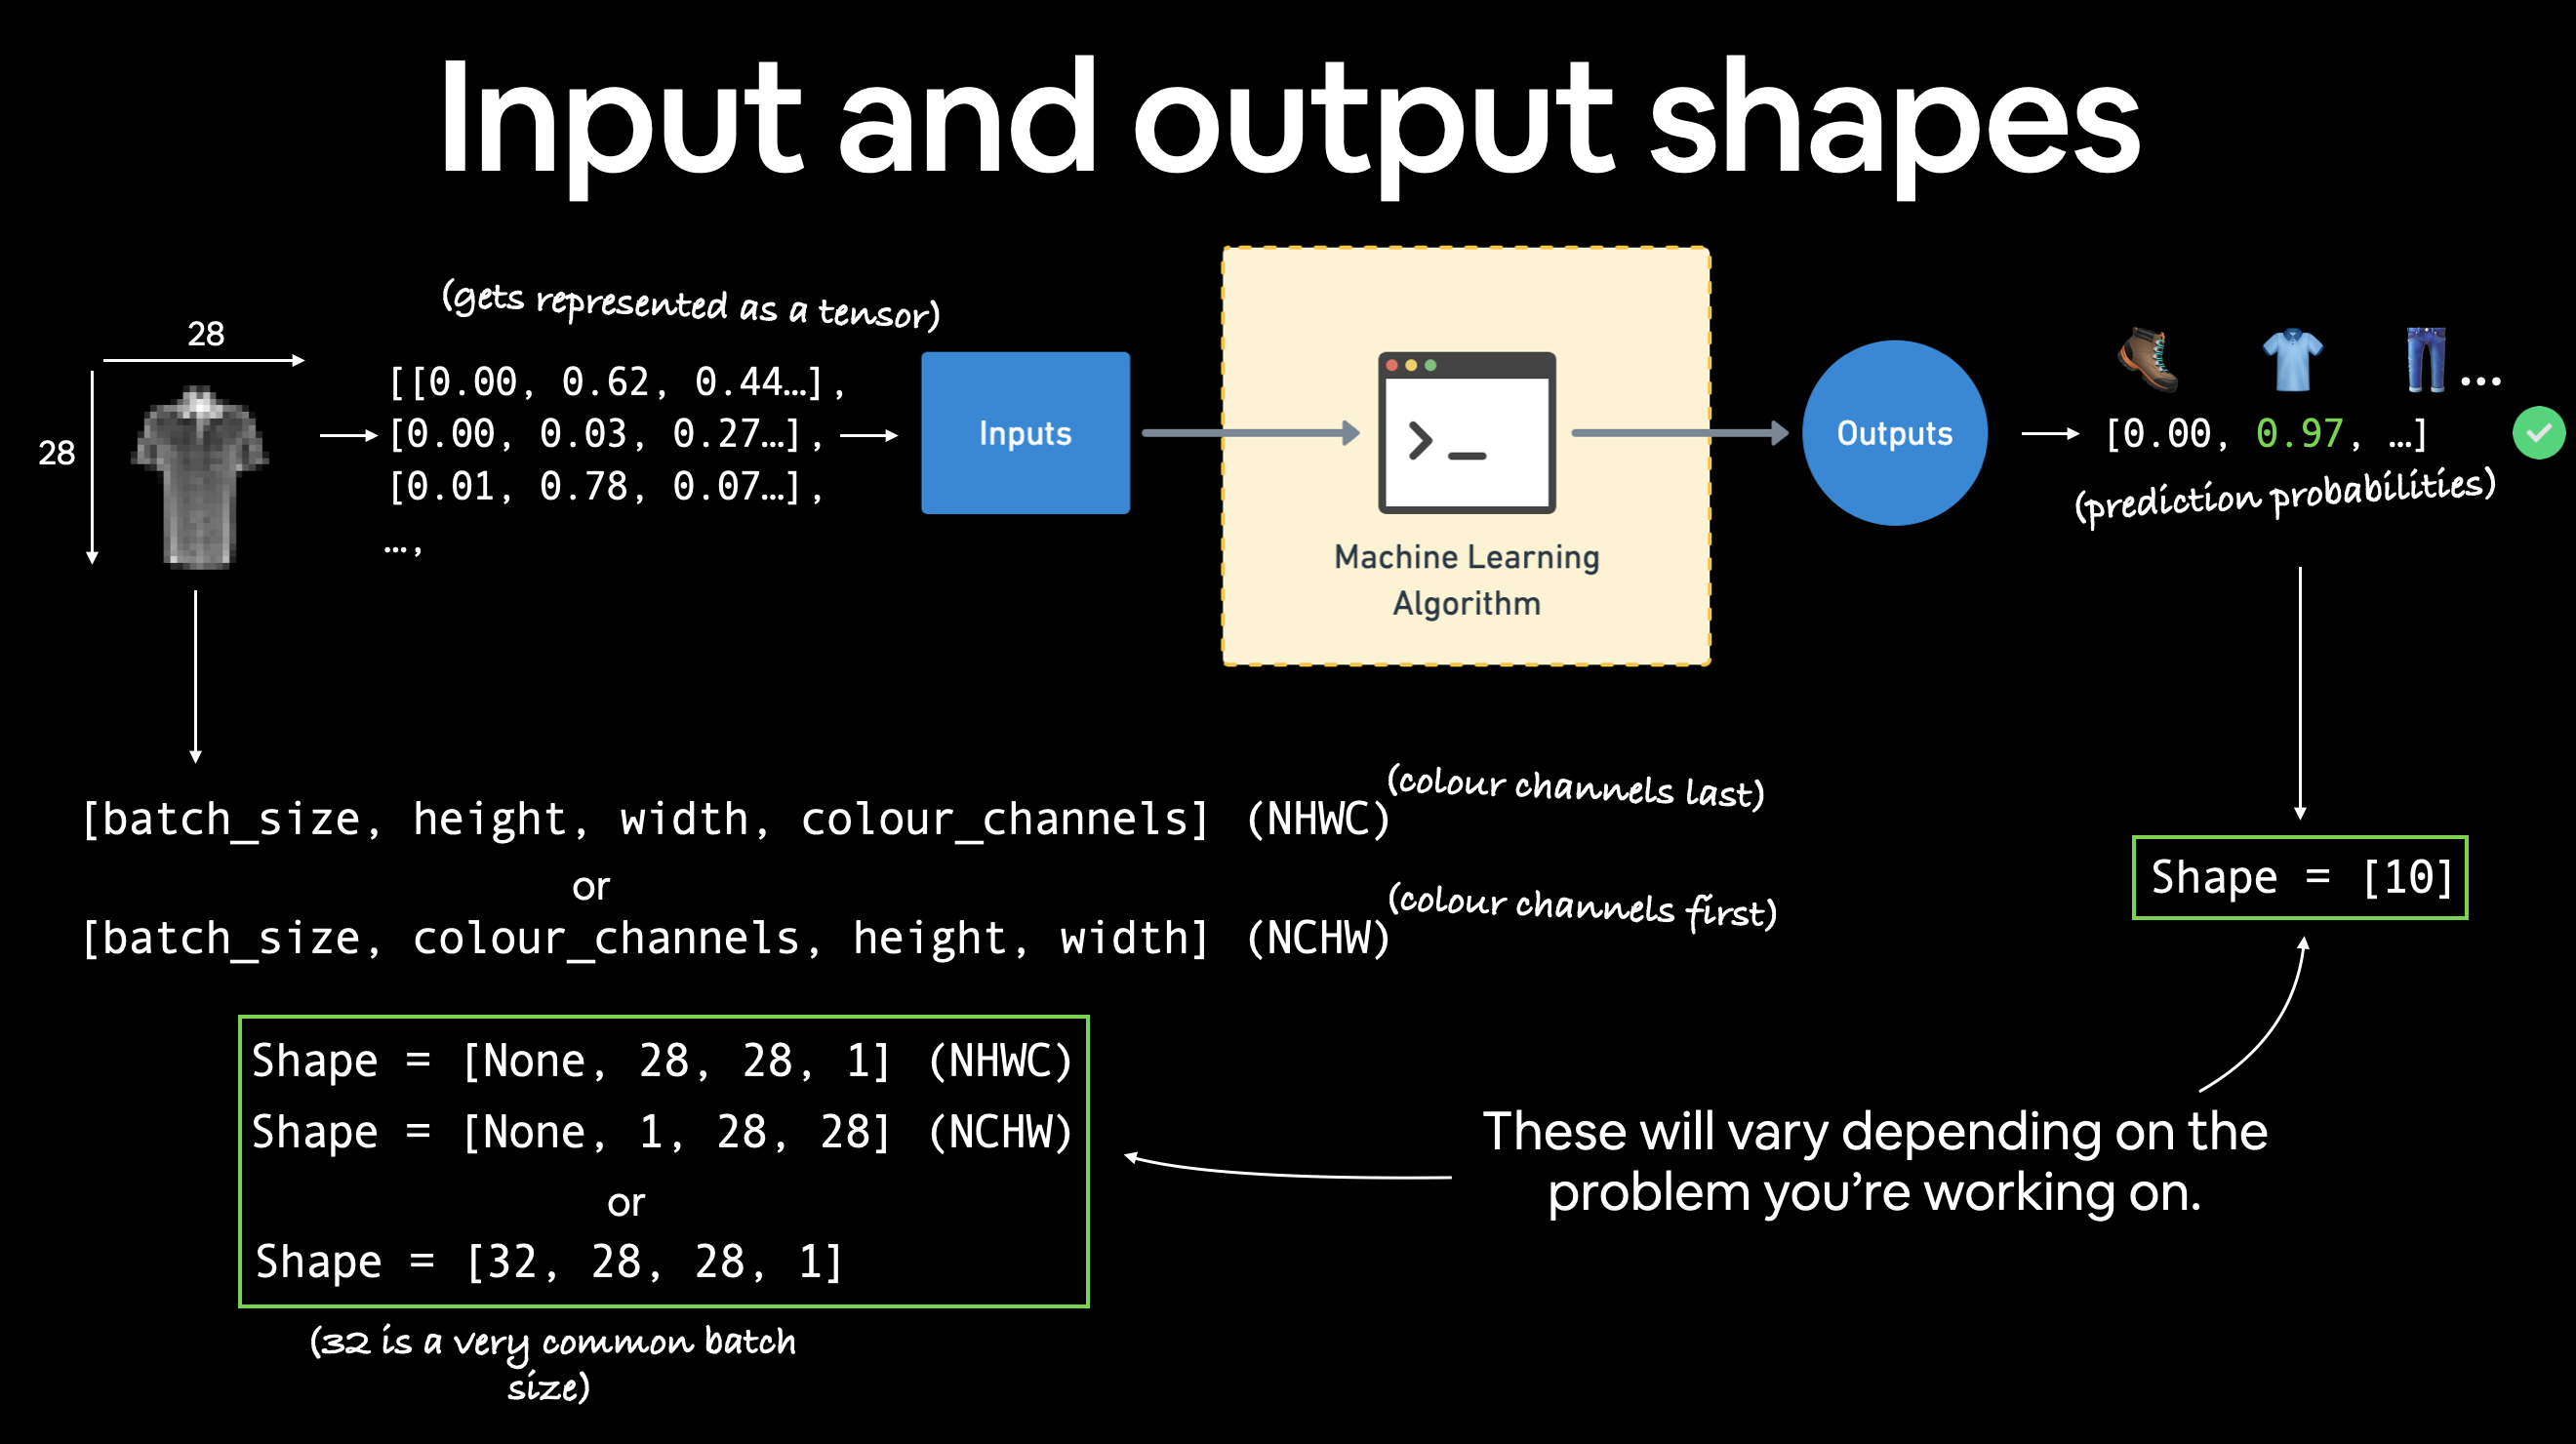

In [5]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(
    test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### 1.2 Visualizing data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

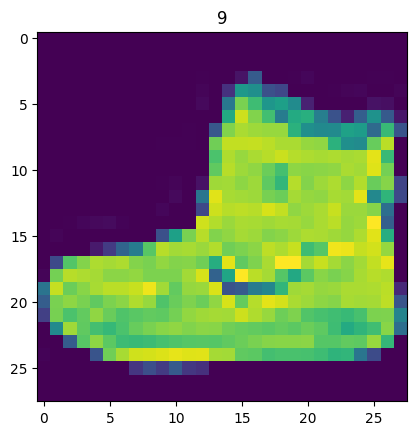

In [7]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
# image shape is [1, 28, 28] (colour channels, height, width)
plt.imshow(image.squeeze())
plt.title(label)

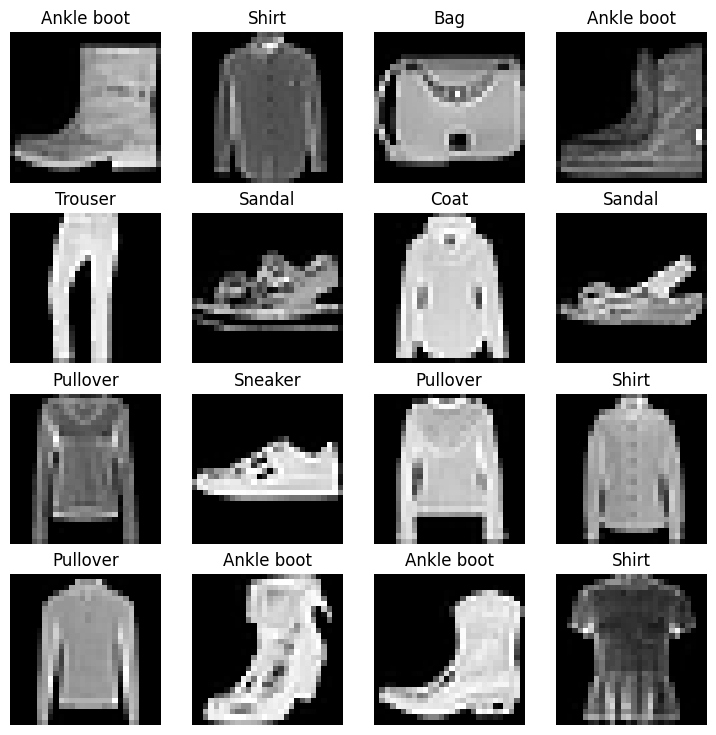

In [8]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

### 2. Prepare Dataloader

In [9]:
from torch.utils.data import DataLoader

# setup batch size hyperparameter
BATCH_SIZE = 32

# turn datasets into iterable (batches)
train_dataloader = DataLoader(
  train_data, # datasets to turn into iterable
  batch_size=BATCH_SIZE, # how many sample per batch?
  shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(
  test_data,
  batch_size=BATCH_SIZE,
  shuffle=False  # tidak harus mengacak data pengujian
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(
    f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(
    f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x00000218A95BD790>, <torch.utils.data.dataloader.DataLoader object at 0x00000218A931C590>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [10]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


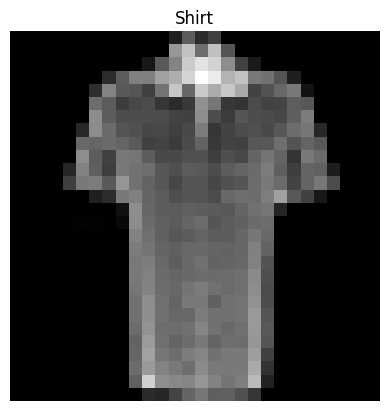

In [11]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off")
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# 3. Model 0: build baseline model

In [12]:
# create a flatten layer
flatten_model = nn.Flatten()

# get sample
x = train_features_batch[0]

# flatten sample
output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(
    f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [13]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(), # input in vector form
      # in_features = number of features in a data sample (784 pixels)
      nn.Linear(in_features=input_shape, out_features=hidden_units),
      nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [14]:
torch.manual_seed(42)

# instantiate model and setup with input parameters
model_0 = FashionMNISTModelV1(
  input_shape=784, # one for every pixel (28x28)
  hidden_units=10, 
  output_shape= len(class_names)
)

model_0.to("cpu")

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 setup loss, optimizer and eval metrics

In [15]:
# use helperfunction as we downloaded from notebook 02
from helper_functions import accuracy_fn

# setup loss func
# this is also called "criterion"/"cost function" in some places
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
  params=model_0.parameters(), lr=0.1
)

### 3.1 time function to calculate time of training model for an experiments

In [16]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### 3.3 creating training loop

In [17]:
from tqdm.auto import tqdm # for progress bar

# set manual seed and set timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

# TRAINING AND TESTING LOOP
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  # TRAINING
  train_loss = 0
  # add a loop to loop throught training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. forward pass
    y_pred = model_0(X)

    # 2. calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulativeliy add up the loss per epoch

    # 3. optim zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    # printout how many sample have been seen
    if batch % 400 == 0:
      print(
          f"Looked at: {batch*len(X)}/{len(train_dataloader.dataset)} samples")
  
  # Divide total train loss by length of train dataloader (average loss per batch per epoch)
  train_loss /= len(train_dataloader)

  ### TESTING
  # setting var for accumulatively adding up loss and acc
  test_loss, test_acc = 0, 0
  model_0.eval()

  with torch.inference_mode():
    for X, y in test_dataloader:
      # 1. forward pass
      test_pred = model_0(X)

      # 2. calculate loss (accumatively)
      test_loss += loss_fn(test_pred, y)

      # 3. calculate acc
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # Calculations on test metrics need to happen inside torch.inference_mode()
    # Divide total test loss by length of test dataloader (per batch)
    test_loss /= len(test_dataloader)
    # divide total acc by length of test data loader (per batch)
    test_acc /= len(test_dataloader)
  
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# calculate train time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

d:\Software\ananconda3\envs\ludesc\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Looked at: 0/60000 samples


Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples


 33%|███▎      | 1/3 [00:30<01:01, 30.63s/it]


Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
----------
Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples


 67%|██████▋   | 2/3 [00:47<00:22, 22.26s/it]


Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
----------
Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples


100%|██████████| 3/3 [00:59<00:00, 19.73s/it]


Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 59.196 seconds


# Make prediction and get model 0 result

In [18]:
torch.manual_seed(42)
def eval_model( model:torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,              
                accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader.

  Args:
      model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
      data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
      loss_fn (torch.nn.Module): The loss function of model.
      accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

  Returns:
      (dict): Results of model making predictions on data_loader.
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # make prediction with model
      y_pred = model(X)

      # accumulate loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # scale loss and acc to find average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

model_0_results = eval_model(model=model_0,
                              data_loader=test_dataloader,
                              loss_fn= loss_fn,
                              accuracy_fn= accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# 5. setup agnostic-code for gpu if there is one

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# 6. Model 1: building a better model with non linearity

In [20]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=output_shape),
      nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

In [21]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,  # number of input features
                              hidden_units=10,
                              # number of output classes desired
                              output_shape=len(class_names)
                              ).to(device)  # send model to GPU if it's available
next(model_1.parameters()).device  # check model device

device(type='cuda', index=0)

### 6.1 setup loss, optim and eval metrics

In [22]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 6.2 functionizing train and test loops

In [23]:
def train_step( model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                accuracy_fn,
                device: torch.device = device):
  
  train_loss, train_acc = 0, 0 
  model.to(device)

  for batch, (X, y) in enumerate(data_loader):
    # send data to GPU
    X, y = X.to(device), y.to(device)

    # 1. feed forward
    y_pred = model(X)

    # 2. calculate trainning loss and acc
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn( y_true=y,
                              y_pred=y_pred.argmax(dim=1))
    
    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. loss bacward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      # send data to GPU
      X, y = X.to(device), y.to(device)

      # 1. forward pass
      test_pred = model(X)
      
      # 2. calculate loss and acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
    
    # adjust matrix and printout
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
  
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [24]:
from tqdm.auto import tqdm  # for progress bar

# set manual seed and set timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

# TRAINING AND TESTING LOOP
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")

  train_step( 
    model=model_1,
    data_loader=train_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    accuracy_fn=accuracy_fn
  )

  test_step(
    model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
  )


# calculate train time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 1.09199 | Train accuracy: 61.34%


 33%|███▎      | 1/3 [00:16<00:33, 16.98s/it]

Test loss: 0.95637 | Test accuracy: 65.00%

Epoch: 1
----------
Train loss: 0.78101 | Train accuracy: 71.93%


 67%|██████▋   | 2/3 [00:33<00:16, 16.64s/it]

Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
----------
Train loss: 0.67027 | Train accuracy: 75.94%


100%|██████████| 3/3 [00:50<00:00, 16.99s/it]

Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cpu: 50.985 seconds


In [25]:
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

ini karena kita telah mensetup data dan model sebagai device agnostik, sehingga data telah berada pada GPU. jadi ita haru smenerapkannya juga pada eval_model func

In [26]:
torch.manual_seed(42)


def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """Returns a dictionary containing the results of model predicting on data_loader.

  Args:
      model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
      data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
      loss_fn (torch.nn.Module): The loss function of model.
      accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

  Returns:
      (dict): Results of model making predictions on data_loader.
  """
  loss, acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # send data to target device
      X, y = X.to(device), y.to(device)
      # make prediction with model
      y_pred = model(X)

      # accumulate loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # scale loss and acc to find average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}


model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# 7. Model 2: builing CNN

In [28]:
class FashionMNISTModelV2(nn.Module):
  """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3, # # how big is the square that's going over the image?
                stride=1, # default
                padding=1),  # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,
                   stride=2)  # default stride value is same as kernel_size
    )

    self.block_2 = nn.Sequential(
      nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
      nn.ReLU(),
      nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(2)
    )

    self.classifier = nn.Sequential(
      nn.Flatten(),
      # Where did this in_features shape come from?
      # It's because each layer of our network compresses and changes the shape of our inputs data.
      nn.Linear(in_features=hidden_units*7*7,
                out_features=output_shape)
    )

  def forward(self, x):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)

    return x
  
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(
  input_shape=1,
  hidden_units=10,
  output_shape=len(class_names)
).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 stepping throught nn.conv2d

In [29]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
# [batch_size, color_channels, height, width]
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]  # get a single image for testing
print(
    f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(
    f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [32]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)  # also try using "valid" or "same" here

# Pass the data through the convolutional layer
# Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input)
conv_layer(test_image)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

jika hanya menggunakan satu gambar maka bakal error. karena conv2d layer expect inputnya dengan ukuran `(N(batch_size), C, H W)` 

kita dapat memperbaikiya dengan menambahkan extra dimensi pada test_image

In [36]:
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [37]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])


Hmm, notice what happens to our shape (the same shape as the first layer of TinyVGG on CNN Explainer), we get different channel sizes as well as different pixel sizes.

What if we changed the values of conv_layer?

In [38]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3,  # same number of color channels as our input image
                         out_channels=10,
                         # kernel is usually a square so a tuple also works
                         kernel_size=(5, 5),
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

Di balik layar, nn.Conv2d() kami mengompresi informasi yang tersimpan dalam gambar.

Hal ini dilakukan dengan melakukan operasi pada input (gambar uji kami) terhadap parameter internalnya.

Tujuannya mirip dengan semua jaringan saraf yang telah kita bangun.

Data masuk dan lapisan mencoba memperbarui parameter internal (pola) untuk menurunkan fungsi kerugian berkat bantuan pengoptimal.

Satu-satunya perbedaan adalah bagaimana lapisan yang berbeda menghitung pembaruan parameter mereka atau dalam istilah PyTorch, operasi yang ada dalam metode layer forward().

In [39]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [40]:
# Get shapes of weight and bias tensors within conv_layer_2
print(
    f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(
    f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]
